In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import datetime as dt

from sat_track import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs

Orbital elements for the aeolus satellite for a specific time:

In [2]:
b_star = 0.12236e-3
b_coef = .00030597
incl = 96.7217
r_asc = 108.6657
ecc = 0.0006209
arg_per = 115.0686
m_anom = 245.1232
m_motion = 15.86481001

In [3]:
timerange = np.arange(0, 864000*3, 60) # calculate position every 60 seconds for 1 day

In [4]:
ra, dec = sat_geoc(dt.datetime.utcnow(), timerange, b_coef, b_star,
                           incl, r_asc, ecc, arg_per, m_anom, m_motion)

In [5]:
x,y,z  = sat_xyz(dt.datetime.utcnow(), timerange, b_coef, b_star,
                           incl, r_asc, ecc, arg_per, m_anom, m_motion)

In [6]:
def sat_plot(longitude, latitude):
    
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Robinson())

    ax1.set_global()
    ax1.stock_img()
    ax1.coastlines()

    return ax1.plot(longitude, latitude,"r", transform=ccrs.Geodetic())

def orbit_plot(x,y,z):
    halfpi, pi, twopi = [f*np.pi for f in (0.5, 1, 2)]
    degs, rads = 180/pi, pi/180
    re = 6378.
    theta = np.linspace(0, twopi, 201)
    cth, sth, zth = [f(theta) for f in (np.cos, np.sin, np.zeros_like)]
    lon0 = re*np.vstack((cth, zth, sth))
    lons = []
    for phi in rads*np.arange(0, 180, 15):
        cph, sph = [f(phi) for f in (np.cos, np.sin)]
        lon = np.vstack((lon0[0]*cph - lon0[1]*sph,
                         lon0[1]*cph + lon0[0]*sph,
                         lon0[2]) )
        lons.append(lon)

    lat0 = re*np.vstack((cth, sth, zth))
    lats = []

    for phi in rads*np.arange(-75, 90, 15):
        cph, sph = [f(phi) for f in (np.cos, np.sin)]
        lat = re*np.vstack((cth*cph, sth*cph, zth+sph))
        lats.append(lat)


    ax2  = fig.add_subplot(1, 2, 2, projection='3d')



    for xlo, ylo, zlo in lons:
        ax2.plot(xlo, ylo, zlo, '-k')
    for xla, yla, zla in lats:
        ax2.plot(xla, yla, zla, '-k')
    return ax2.plot(x, y, z, "r-")

In [7]:
def update(incl=incl, r_asc=r_asc, arg_per=arg_per, m_anom=m_anom, m_motion=m_motion,
           b_coef=b_coef, b_star=b_star, ecc=ecc):
    sat_pos = comp_sat(dt.datetime.utcnow(), timerange, b_coef, b_star,
                       incl, r_asc, ecc, arg_per, m_anom, m_motion)
    topos = sat_pos.subpoint()
    ra = topos.longitude._degrees
    dec = topos.latitude.degrees

    line1.set_ydata(dec)
    line1.set_xdata(ra)
    
    x, y, z = sat_pos.position.km
    line2.set_data_3d(x,y,z)

<IPython.core.display.Javascript object>


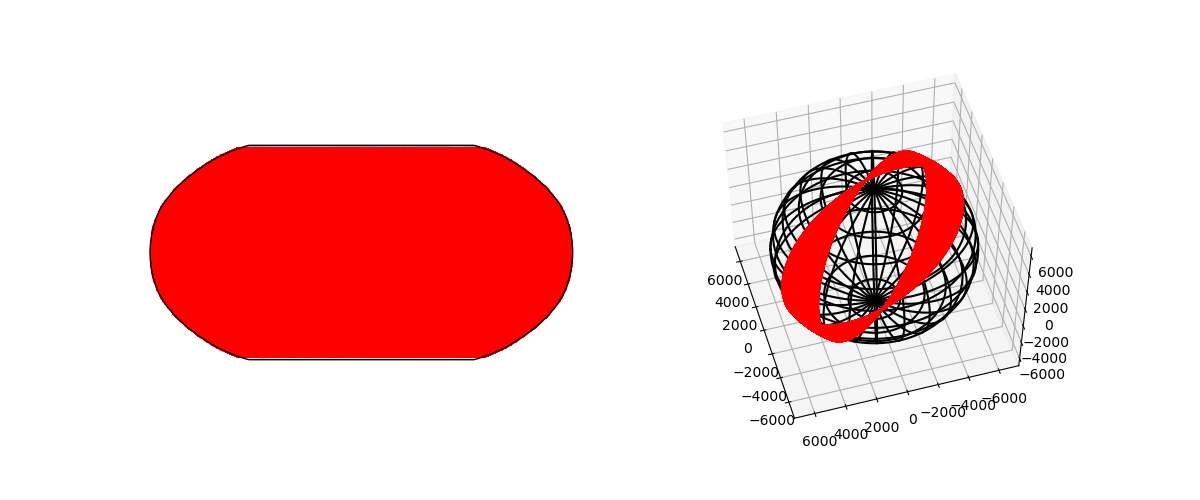

In [8]:

fig = plt.figure(2,figsize=(12,5))


In [9]:
line1, = sat_plot(ra, dec)
line2, = orbit_plot(x,y,z)

In [10]:
interact(update, incl=(0,180), r_asc=(0,360), arg_per=(0,360),ecc=(0.,1.))

interactive(children=(IntSlider(value=96, description='incl', max=180), IntSlider(value=108, description='r_as…

<function __main__.update(incl=96.7217, r_asc=108.6657, arg_per=115.0686, m_anom=245.1232, m_motion=15.86481001, b_coef=0.00030597, b_star=0.00012236, ecc=0.0006209)>

In [11]:
plt.show()